In [1]:
import pickle
# Bugfix thanks to: http://stackoverflow.com/questions/11305790/pickle-incompatability-of-numpy-arrays-between-python-2-and-3 
def unpickle(filename):
    with open(filename, 'rb') as fo: 
        return pickle.load(fo, encoding='latin1')

In [2]:
import os
import numpy as np 

data_folder = os.path.join(os.path.expanduser("~"), "data", "cifar-10-batches-py")

batches = [] 
for i in range(1, 6):
    batch_filename = os.path.join(data_folder, "data_batch_{}".format(i))
    batches.append(unpickle(batch_filename)) 
    #break

In [3]:
len(batches)

5

In [4]:
X = np.vstack([batch['data'] for batch in batches])

In [5]:
X.shape

(50000, 3072)

In [6]:
X = np.array(X) / X.max() 
X = X.astype(np.float32)

In [7]:
from keras.utils import np_utils
y = np.hstack(batch['labels'] for batch in batches).flatten()
nb_classes = len(np.unique(y))
y = np_utils.to_categorical(y, nb_classes)

Using TensorFlow backend.


In [8]:
X.shape, y.shape

((50000, 3072), (50000, 10))

In [9]:
y.shape

(50000, 10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.shape, y_train.shape

((40000, 3072), (40000, 10))

In [12]:
X_train.shape, y_train.shape

((40000, 3072), (40000, 10))

In [13]:
X_test.shape, y_test.shape

((10000, 3072), (10000, 10))

In [14]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [15]:
X_train.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D

In [17]:
n_samples, h, w, d = X_train.shape

In [18]:
n_samples, h, w, d

(40000, 32, 32, 3)

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
nb_classes

10

In [22]:
conv1 = Convolution2D(32, (3, 3), input_shape=(h, w, d), activation = "relu", padding="same")
pool1 = MaxPooling2D()
conv2 = Convolution2D(64, (2, 2), activation = "relu")
pool2 = MaxPooling2D()
conv3 = Convolution2D(128, (2, 2), activation = "relu")
pool3 = MaxPooling2D()
flatten = Flatten()
hidden4 = Dense(500, activation = "relu")
hidden5 = Dense(500, activation = "relu")
output = Dense(nb_classes, activation = "softmax")  # softmax?
layers = [conv1, pool1,
          conv2, pool2,
          conv3, pool3,
          flatten, hidden4, hidden5,
          output]

In [23]:
model = Sequential(layers=layers)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [24]:
X_test.shape

(10000, 32, 32, 3)

In [25]:
y_test.shape

(10000, 10)

In [26]:
import tensorflow as tf

history = model.fit(X_train, y_train, epochs=50, verbose=False, 
                   validation_data=(X_test, y_test),batch_size=1000)

In [27]:
%matplotlib inline

Text(0,0.5,'Loss')

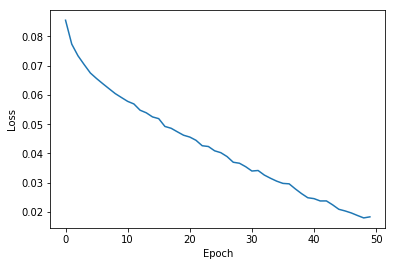

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred.argmax(axis=1),
                            y_true=y_test.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.67      0.66      0.67      1007
          1       0.68      0.62      0.64       980
          2       0.61      0.42      0.50      1035
          3       0.37      0.47      0.41       961
          4       0.54      0.51      0.52       977
          5       0.45      0.51      0.48      1006
          6       0.66      0.68      0.67      1012
          7       0.62      0.67      0.64      1001
          8       0.76      0.70      0.73      1046
          9       0.60      0.65      0.62       975

avg / total       0.60      0.59      0.59     10000

